

<h1> <center>Análise de Dados - Cadastro Geral de Empregados e Desempregados - BRASIL - 2019 </center></h1>

Fonte: site basesedosdados.org


Na análise consideramos os trabalhadores pretos e pardos como negros, os reabilitados como 'não deficiente'. As categorias de escolaridade(Até a 5ª série, 6ª série ao 9º ano) foram renomeadas para 'Fundamental incompleto'. O valor do salário mínimo em 2019 era R$ 998,00, esse valor foi utilizado como base de cálculo para as faixas salariais.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 7.1 MB/s 


In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_point,aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine.data import *



        Ao acessar os dados do CAGED pelo datalake público(https://basedosdados.org/dataset/br-me-caged) foi feito um filtro pelo ano com SQL e selecionado apenas 2019. Obtivemos uma base final composta por 30.865.840 registros com 40 colunas. e assim para observar a distribuição pelo território nacional deste ano foi feita a extração da quantidade de trabalhadores por estado.





In [5]:
#Lendo os dados tratados do dataframe df contém dados com os trabalhadores cadastrados no Brasil em 2019)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BaseCaged2019.csv')
df.head()

,Unnamed: 0,mes,sigla_uf,admitidos_desligados,salario_mensal,indicador_portador_deficiencia,tipo_deficiencia,grau_instrucao,idade,sexo,raca_cor
0,0,Janeiro,AC,Admissao,1077,sem deficiencia,Nao deficiente,Medio completo,20,Feminino,Negra
1,1,Janeiro,AC,Admissao,1077,sem deficiencia,Nao deficiente,Medio completo,24,Feminino,Negra
2,2,Janeiro,AC,Admissao,1617,sem deficiencia,Nao deficiente,Medio completo,23,Feminino,Negra
3,3,Janeiro,AC,Admissao,1500,sem deficiencia,Nao deficiente,Superior completo,31,Feminino,Negra
4,6,Janeiro,AC,Admissao,1020,sem deficiencia,Nao deficiente,Medio completo,36,Feminino,Negra


# Trabalhadores cadastrados por estado

In [6]:
#Gerando a tabela de trabalhadores cadastrados por estado
df_Uf = pd.DataFrame(df['sigla_uf'].value_counts())
df_Uf['Proporcao'] = round(df_Uf * 100/df_Uf.sum(),1)
df_Suf = df_Uf.sort_values(by='sigla_uf')
df_Suf.reset_index(drop = True)
print('-----------Tabela com a quantidade de trabalhadores cadastrados por estado - 2019-----------')
df_Suf.sort_index()

-----------Tabela com a quantidade de trabalhadores cadastrados por estado - 2019-----------


,sigla_uf,Proporcao
AC,31973,0.1
AL,186001,0.7
AM,234228,0.9
AP,33373,0.1
BA,902992,3.5
CE,647390,2.5
DF,452968,1.8
ES,596946,2.3
GO,955673,3.7
MA,249742,1.0


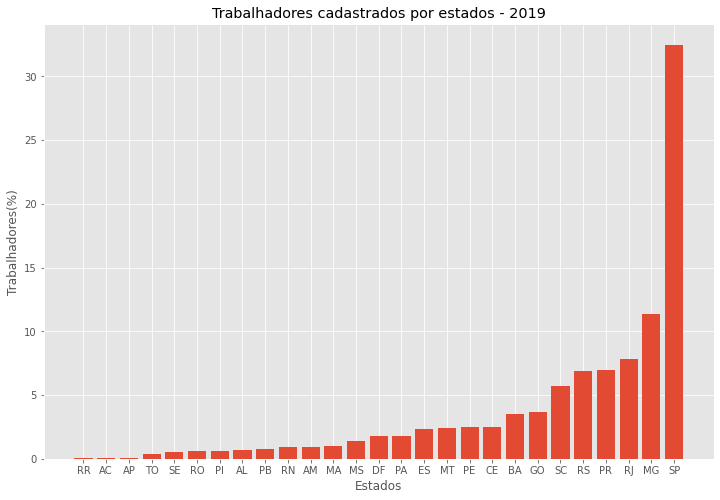

In [7]:
#Gerando o gráfico de trabalhadores cadastrados por estado
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
plt.bar(df_Suf.index , df_Suf['Proporcao'])
plt.title('Trabalhadores cadastrados por estados - 2019')
plt.xlabel('Estados')
plt.ylabel('Trabalhadores(%)')
plt.savefig('GraficoEstados.png')
plt.show()

    
    Os estados que possuem o maior número de trabalhadores cadastrados no CAGED pertencem as regiões sudeste e sul, no ranking, os 5 primeiros estados são:
    
1º São Paulo
2º Minas Gerais
3º Paraná
4º Rio de Janeiro
5º Rio Grande do Sul

     Já na  região norte encontramos os estados com menos de 1% dos trabalhadores cadastrados, são eles: Amazonas,Amapá,Acre,Rondônia,Roraima e Tocantins.

In [8]:
#Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25716831 entries, 0 to 25716830
Data columns (total 11 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Unnamed: 0                      int64 
 1   mes                             object
 2   sigla_uf                        object
 3   admitidos_desligados            object
 4   salario_mensal                  int64 
 5   indicador_portador_deficiencia  object
 6   tipo_deficiencia                object
 7   grau_instrucao                  object
 8   idade                           int64 
 9   sexo                            object
 10  raca_cor                        object
dtypes: int64(3), object(8)
memory usage: 2.1+ GB


 60% dos trabalhadores são do gênero masculino

In [9]:
#Tabela com a distribuição dos trabalhadores por gênero
dfPes = pd.DataFrame(df['sexo'].value_counts())
dfPes['Proporcao'] = round((dfPes['sexo'] * 100)/dfPes['sexo'].sum(),1)
dfPes.sort_index()

,sexo,Proporcao
Feminino,10276183,40.0
Masculino,15440648,60.0


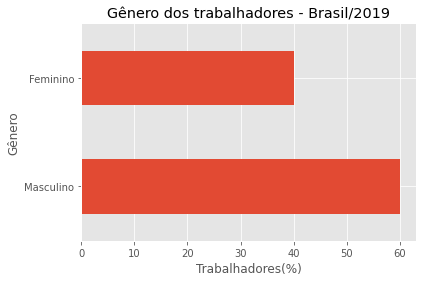

In [10]:
#Gerando o gráfico com a distribuição dos trabalhadores por gênero
plt.style.use('ggplot')
dfPes['Proporcao'].plot(kind = 'barh')
plt.title('Gênero dos trabalhadores - Brasil/2019')
plt.xlabel('Trabalhadores(%)')
plt.ylabel('Gênero')
plt.savefig('Genero.png')

Os trabalhadores que se idenficam como negros representam 49% 

In [11]:
#Tabela com a distribuição dos trabalhadores por raça
dfRaca = pd.DataFrame(df['raca_cor'].value_counts())
dfRaca['Proporcao'] = round(dfRaca['raca_cor'] * 100/dfRaca['raca_cor'].sum(),1)
dfRaca.sort_values(by = 'Proporcao',ascending = False)

,raca_cor,Proporcao
Branca,12897731,50.2
Negra,12590611,49.0
Amarela,151973,0.6
Indigena,76516,0.3


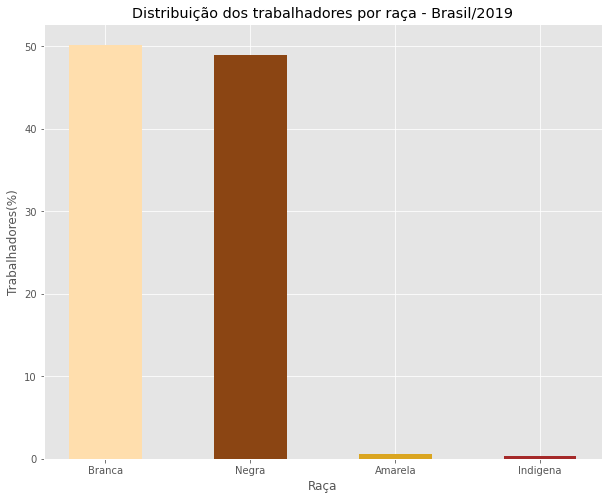

In [12]:
#Gerando o gráfico com a distribuição dos trabalhadores por raça
Amarela = 0.6
Branca = 50.2
Indigena = 0.3
Negra = 49.0

# Definindo a largura da barra
barWidth = 0.5

# Aumentando o gráfico
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

# Criando as barras
plt.bar('Branca',Branca, color='navajowhite', width=barWidth, align='center')
plt.bar('Negra', Negra, color='saddlebrown', width=barWidth, align='center')
plt.bar('Amarela',Amarela, color='goldenrod', width=barWidth, align='center')
plt.bar('Indigena',Indigena, color='brown', width=barWidth, align='center')

# Adicionando legendas
plt.title('Distribuição dos trabalhadores por raça - Brasil/2019')
plt.xlabel('Raça')
plt.ylabel('Trabalhadores(%)')
plt.savefig('Raca.png')
# Mostrando o gráfico
plt.show()

In [13]:
#Tabela dinâmica com a distribuição dos trabalhadores por raça e gênero
tableRGen = pd.pivot_table(df, values= ['idade'], index=['raca_cor'],
                    columns=['sexo'], aggfunc= 'count')
tableRGen

idade          
sexo     Feminino Masculino
raca_cor                   
Amarela     65632     86341
Branca    5658487   7239244
Indigena    23827     52689
Negra     4528237   8062374

A faixa etária de 20 a 24 anos representa 19,9% dos cadastros no CAGED


In [14]:
#Distribuindo os trabalhadores por faixa etária
bin_labels =labels=['14 a 19 anos', '20 a 24 anos', '25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 a 65 anos']
df['faixa_etaria'] = pd.cut(x=df['idade'], bins=[14,20,25,30,35,40,45,50,55,60,65],labels=bin_labels)
print('------Distribuição dos trabalhadores por faixa etária - Brasil/2019-------')
dfFaixas = pd.DataFrame(df['faixa_etaria'].value_counts())
dfFaixas.sort_index(ascending= True,inplace=True)
dfFaixas['proporcao'] = round(dfFaixas * 100 / dfFaixas.sum(),1)
dfFaixas

------Distribuição dos trabalhadores por faixa etária - Brasil/2019-------


,faixa_etaria,proporcao
14 a 19 anos,3104971,12.1
20 a 24 anos,5108157,19.9
25 a 29 anos,4546343,17.7
30 a 34 anos,3974059,15.5
35 a 39 anos,3295553,12.8
40 a 44 anos,2270246,8.8
45 a 49 anos,1548233,6.0
50 a 54 anos,1030271,4.0
55 a 59 anos,579783,2.3
60 a 65 anos,246769,1.0


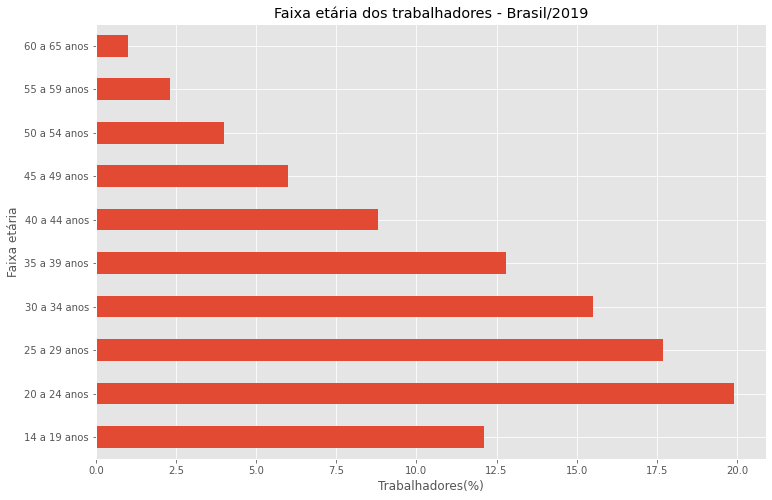

In [15]:
#Gerando o gráfico com as faixas etárias
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
dfFaixas['proporcao'].plot(kind ='barh')
matplotlib.pyplot.title('Faixa etária dos trabalhadores - Brasil/2019')
matplotlib.pyplot.xlabel('Trabalhadores(%)')
matplotlib.pyplot.ylabel('Faixa etária')
plt.savefig('FaixaEtaria.png')

In [16]:
#Distribuição dos trabalhadores por escolaridade
dfEsco = pd.DataFrame(df['grau_instrucao'].value_counts())
dfEsco.index = ['Analfabeto','Fundamental incompleto','Fundamental completo','Medio incompleto','Medio completo','Superior incompleto','Superior completo']
dfEsco['grau_instrucao'] = [112611,2809041,2295012,2270358,14279793,1130573,2819442]
dfEsco['Proporcao'] = round(dfEsco * 100 / dfEsco.sum(),1)
dfEsco

,grau_instrucao,Proporcao
Analfabeto,112611,0.4
Fundamental incompleto,2809041,10.9
Fundamental completo,2295012,8.9
Medio incompleto,2270358,8.8
Medio completo,14279793,55.5
Superior incompleto,1130573,4.4
Superior completo,2819442,11.0


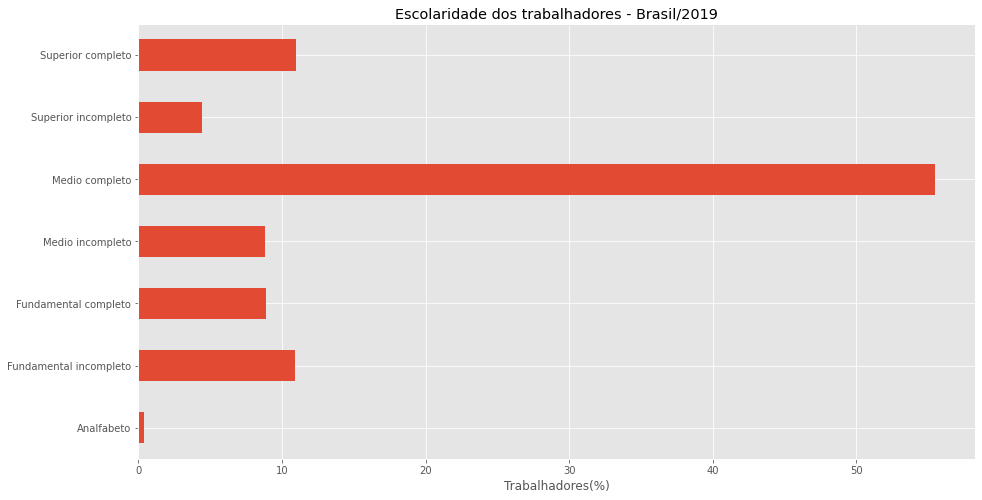

In [17]:
#Gerando o gráfico com a escolaridade dos trabalhadores
plt.figure(figsize = (15,8))
dfEsco['Proporcao'].plot(kind = 'barh')
plt.xlabel('Trabalhadores(%)')
plt.title('Escolaridade dos trabalhadores - Brasil/2019')
plt.savefig('Escolaridade.png')

In [18]:
#Tabela dinâmica com a distribuição dos trabalhadores por raça, tipo de deficiência e faixa salarial
tableSalEsc = pd.pivot_table(df, values= ['idade'], index=['grau_instrucao'],
                    columns=['sexo'], aggfunc= 'count')
tableSalEsc 

idade          
sexo                   Feminino Masculino
grau_instrucao                           
Analfabeto                18615     93996
Fundamental completo     640498   1654514
Fundamental incompleto   619621   2189420
Medio completo          6013970   8265823
Medio incompleto         760403   1509955
Superior completo       1617278   1202164
Superior incompleto      605798    524775

<Figure size 1440x1080 with 0 Axes>

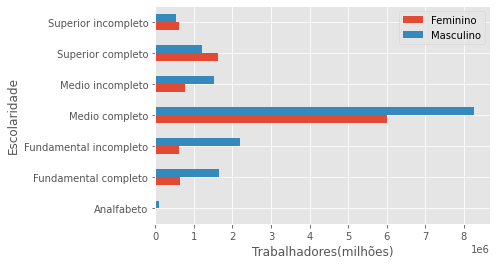

In [19]:
#Gerando o gráfico com a escolaridade e gênero
plt.figure(figsize= (20,15))
tableSalEsc.plot.barh()
plt.xticks()
plt.xlabel('Trabalhadores(milhões)')
plt.ylabel('Escolaridade')
plt.legend(['Feminino','Masculino'])
plt.savefig('EscolaridadeGen.png')


 O mês de fevereiro possui 8,9% dos trabalhadores cadastrados em 2019

In [20]:
#Criando o dataframe contendo a quantidade de trabalhadores cadastrados por mês
df_mes = pd.DataFrame(df['mes'].value_counts() ,index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro']) 
df_mes['proporcao'] = round(df_mes * 100/df_mes.sum(),1)
df_mes

,mes,proporcao
Janeiro,2212826,8.6
Fevereiro,2300437,8.9
Março,2155761,8.4
Abril,2207178,8.6
Maio,2227728,8.7
Junho,2047998,8.0
Julho,2165734,8.4
Agosto,2187547,8.5
Setembro,2090604,8.1
Outubro,2188653,8.5


No handles with labels found to put in legend.


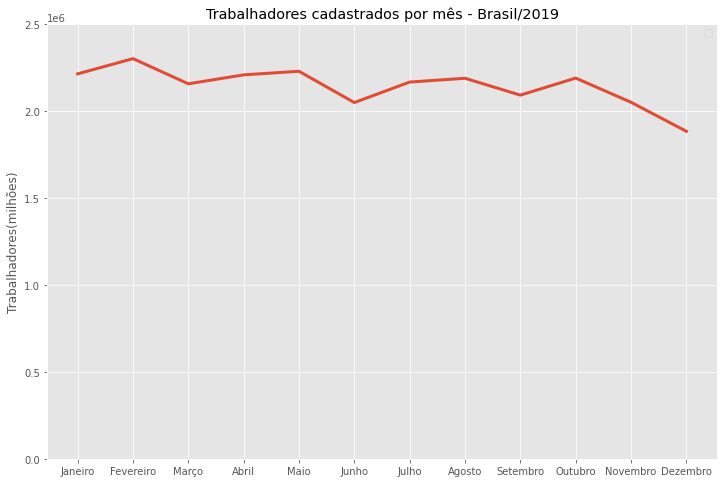

In [21]:
#Gerando o Gráfico de linha dos trabalhadores cadastrados por mês
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax =  plt.axes()
ax.set_ylim([0,2.6])
ax.set_yticks([0,500000,1000000,1500000,2000000,2500000])
plt.plot(df_mes.index,df_mes['mes'],linewidth = 3)
plt.title('Trabalhadores cadastrados por mês - Brasil/2019')
plt.ylabel('Trabalhadores(milhões)')
plt.savefig('TrabalhadoresMes.png')
plt.legend()
plt.show()

Em 2019 ocorreram 12.761.737 desligamentos e 12.955.094 admissões.   Os meses que apresentaram o maior número de admissões e desligamentos, foram fevereiro com 1.208.769 admissões, e em maio foram 1.112.599 desligamentos.

In [22]:
#Renomeando os dados da coluna admitidos_desligados e imprimindo a quantidade de admissões e desligamentos. 
df_situacao = pd.DataFrame(df['admitidos_desligados'].value_counts())
df['admitidos_desligados'].replace("Admissao",'Admitido', inplace=True)
df['admitidos_desligados'].replace('Desligamento','Desligado',inplace=True)
df_situacao['Proporcao'] = round(df_situacao * 100 / df_situacao.sum(),1)
df_situacao

,admitidos_desligados,Proporcao
Admissao,12955094,50.4
Desligamento,12761737,49.6


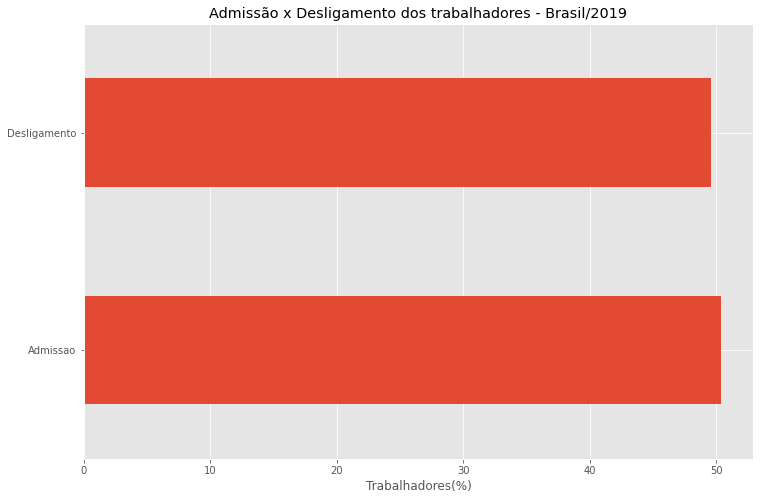

In [23]:
#Gerando o gráfico com a proporção de admissõese desligamentos 
plt.figure(figsize = (12,8))
df_situacao['Proporcao'].plot(kind = 'barh')
plt.xlabel('Trabalhadores(%)')
plt.xticks()
plt.ylabel('')
plt.title('Admissão x Desligamento dos trabalhadores - Brasil/2019')
plt.savefig('AdmissaoDesligamento.png')



In [24]:
#Criando o dataframe com a quantidade de trabalhadores admitidos por mês
df_adm = df.loc[df['admitidos_desligados'] == 'Admitido']
df_adm = pd.DataFrame(df_adm['mes'].value_counts(),index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'])
#df_adm = df_adm.sort_index(ascending = False)
df_adm['Proporcao_Admitidos'] = round(df_adm['mes'] * 100/df_adm['mes'].sum(),1)
#df_adm.loc['total'] = df_adm.sum(axis = 0)
#df_adm


In [25]:
#Criando o dataframe com a quantidade de trabalhadores desligados por mês
df_desl = df.loc[df['admitidos_desligados'] == 'Desligado']
df_desl = pd.DataFrame(df_desl['mes'].value_counts(),index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'])
df_desl['Proporcao_Desligados'] = round(df_desl['mes']*100/df_desl['mes'].sum(),1)
#df_desl.loc['total'] = df_desl.sum(axis = 0)


In [26]:
#Concatenando as tabelas de trabalhadores admitidos e desligados por mês
dfSituacao = pd.concat([df_adm,df_desl], axis=1)
dfSituacao

,mes,Proporcao_Admitidos,mes,Proporcao_Desligados
Janeiro,1112832,8.6,1099994,8.6
Fevereiro,1208769,9.3,1091668,8.6
Março,1049423,8.1,1106338,8.7
Abril,1150029,8.9,1057149,8.3
Maio,1115129,8.6,1112599,8.7
Junho,1034255,8.0,1013743,7.9
Julho,1088183,8.4,1077551,8.4
Agosto,1129464,8.7,1058083,8.3
Setembro,1098961,8.5,991643,7.8
Outubro,1111657,8.6,1076996,8.4


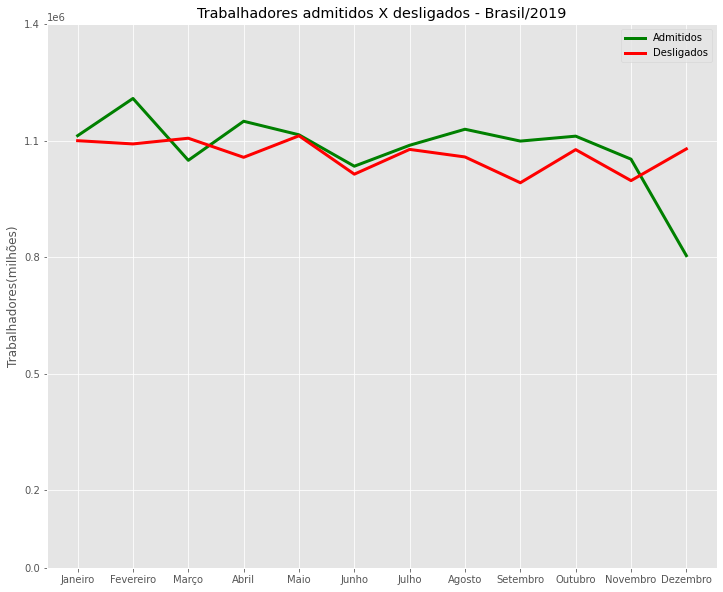

In [27]:
#Gerando o gráfico com os trabalhadores admitidos e desligados
y_adm = df_adm['mes'].tolist()
y_desl = df_desl['mes'].tolist()
x = df_desl.index.to_list()
plt.figure(figsize = (12,10))
plt.style.use('ggplot')
ax =  plt.axes()
ax.set_ylim([0,1.5])
ax.set_yticks([0,200000,500000,800000,1100000,1400000])
#ax.set_ylim([0,9.5])
#ax.set_yticks([0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0])
plt.plot(x,y_adm,y_desl)
plt.plot(y_adm, label = 'Admitidos',color = 'green',linewidth = 3)
plt.plot(y_desl, label = 'Desligados', color = 'red',linewidth = 3)
plt.ylabel('Trabalhadores(milhões)')
plt.title('Trabalhadores admitidos X desligados - Brasil/2019')
plt.legend()
plt.savefig('Admitidos_Desligados.png')
plt.show()

In [28]:
#Agrupando os salários em faixas salariais
bin_labels =labels=['Até 1 salário mínimo', '1 a 2 salários mínimos', '2 a 3 salários mínimos','3 a 4 salários mínimos','4 a 5 salários mínimos','Acima de 5 salários mínimos']
df['faixa_salarial'] = pd.cut(x=df['salario_mensal'],bins=[0,997.99,1995.99,2993.99,3991.99,4989.99,4990.01],labels=bin_labels)

In [29]:
print('------Distribuição dos trabalhadores por faixa salarial - Brasil/2019-------')
print('*Os salários informados com 0, foram excluídos')
dfSalarios = pd.DataFrame(df['faixa_salarial'].value_counts())
dfSalarios.sort_index(ascending= True, inplace=True)
dfSalarios['proporcao'] = round(dfSalarios * 100 / dfSalarios.sum(),1)
dfSalarios


------Distribuição dos trabalhadores por faixa salarial - Brasil/2019-------
*Os salários informados com 0, foram excluídos


,faixa_salarial,proporcao
Até 1 salário mínimo,1517317,6.1
1 a 2 salários mínimos,20126138,80.4
2 a 3 salários mínimos,2344194,9.4
3 a 4 salários mínimos,726605,2.9
4 a 5 salários mínimos,317886,1.3
Acima de 5 salários mínimos,497,0.0


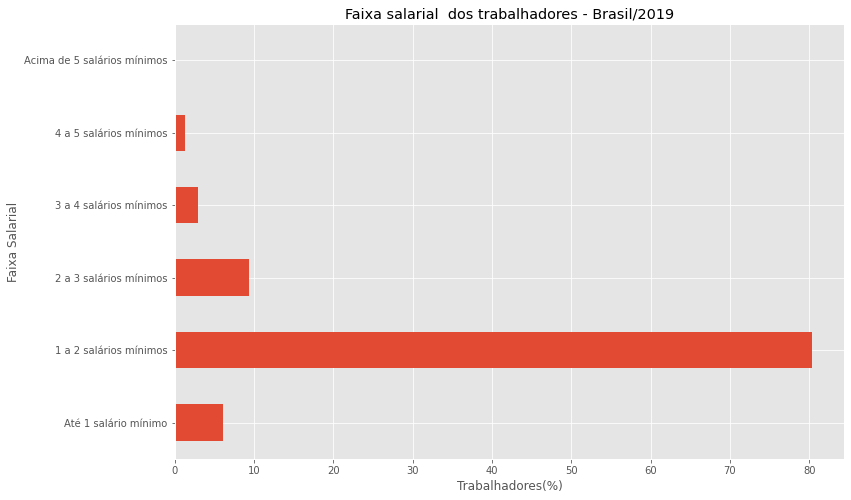

In [30]:
#Gerando o gráfico com as faixas salariais 
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
dfSalarios['proporcao'].plot(kind = 'barh')
matplotlib.pyplot.title('Faixa salarial  dos trabalhadores - Brasil/2019')
matplotlib.pyplot.xlabel('Trabalhadores(%)')
matplotlib.pyplot.ylabel('Faixa Salarial')
plt.savefig('FaixaSalarial.png')

In [31]:
#Medidas de Dispersão da variável salario_mensal para o Brasil - 2019
print('--------Medidas de Dispersão - Salário mensal------------ ')
df['salario_mensal'].describe().round(2)

--------Medidas de Dispersão - Salário mensal------------ 


count    25716831.00
mean         1693.65
std          2040.70
min           300.00
25%          1107.00
50%          1313.00
75%          1661.00
max        149700.00
Name: salario_mensal, dtype: float64

In [32]:
# Quartis dos salários mensais dos trabalhadores cadastrados no período pesquisado.
q1 = df['salario_mensal'].quantile(0.25)
q3 = df['salario_mensal'].quantile(0.75)

In [33]:
#Cálculo da amplitude interquartil
iqr = q3-q1

In [34]:
#Cálculo dos  limites inferior e superior
li = q1 - (1.5 * iqr)
ls = q3 + (1.5 * iqr)
li , ls

(276.0, 2492.0)

Identificamos 23.241.890 registros de trabalhadores com salários entre 276,00 e  2.492,00 reais.Os salários inferiores a 276,00 e os salários superiores a 2.492,00 foram considerados outilers 

In [35]:
#Dataframe com os registros de salários entre os limites inferior(276,00) e superior(2.492,00)
salario_sem_outlier = pd.DataFrame(df[((df['salario_mensal'] >= li) & (df['salario_mensal'] <= ls))])
salario_sem_outlier['salario_mensal'].describe().round(2)

count    23241890.00
mean         1333.59
std           367.75
min           300.00
25%          1089.00
50%          1275.00
75%          1510.00
max          2492.00
Name: salario_mensal, dtype: float64

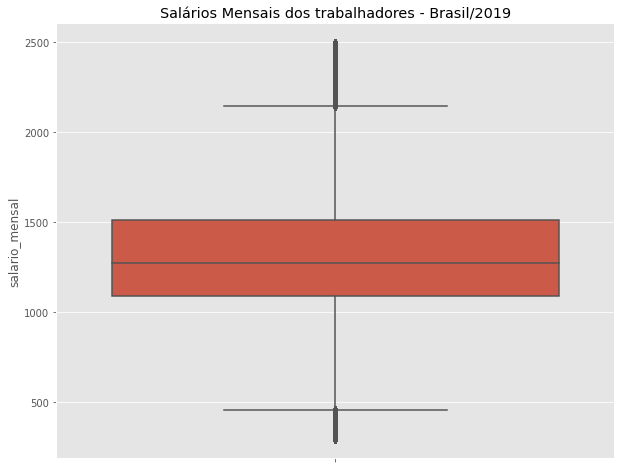

In [36]:
#Gerando o boxplot com os salários mensais, de acordo com o limite inferior e o limite superior
plt.figure(figsize = (10,8))
plt.style.use('ggplot')
sns.boxplot(y = salario_sem_outlier['salario_mensal'])
plt.title('Salários Mensais dos trabalhadores - Brasil/2019')
plt.savefig('BoxplotSalario.png')

In [37]:
#Medidas de dispersão dos salários agrupados pela raça
df.groupby(by = 'raca_cor')['salario_mensal'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
raca_cor,,,,,,,,
Amarela,151973.0,2183.67,3297.26,300.0,1089.0,1325.0,1835.0,120606.0
Branca,12897731.0,1873.57,2498.78,300.0,1174.0,1380.0,1779.0,149700.0
Indigena,76516.0,1592.61,1536.98,300.0,1110.0,1269.0,1600.0,109780.0
Negra,12590611.0,1504.04,1375.57,300.0,1060.0,1238.0,1552.0,149700.0


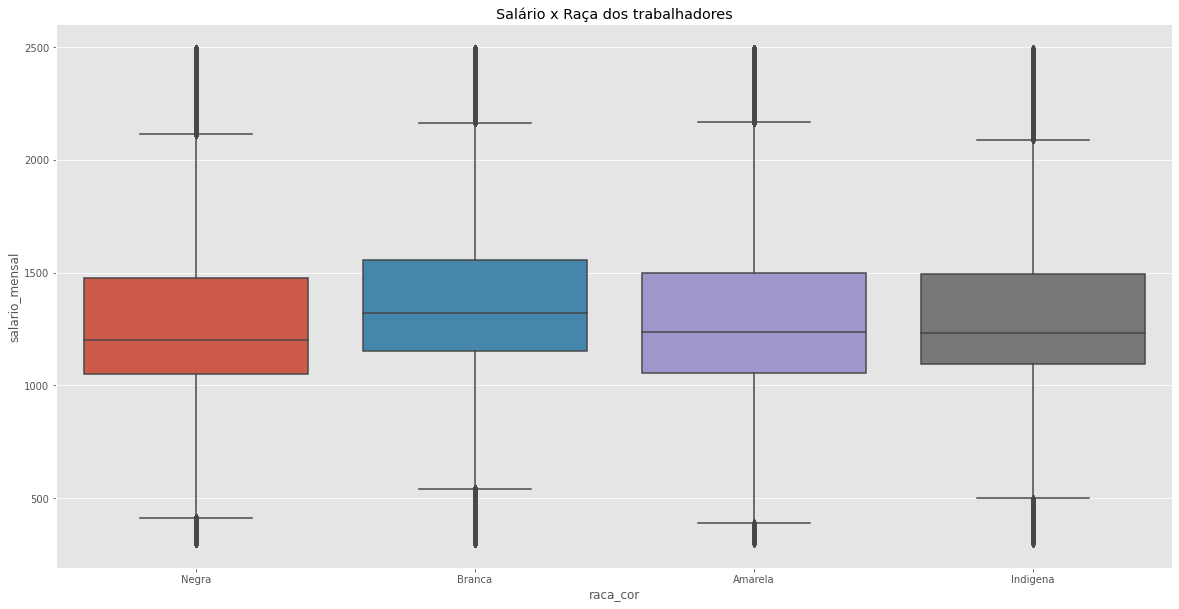

In [38]:
#Boxplot com os salários do trabalhadores distribuidos por raça/cor
plt.figure(figsize = (20,10))
plt.style.use('ggplot')
plt.title('Salário x Raça dos trabalhadores')
sns.boxplot(x = salario_sem_outlier['raca_cor'], 
            y = salario_sem_outlier['salario_mensal'])
plt.savefig('BoxplotRaca_salario.png')


In [40]:
#Medidas de dispersão dos salários agrupados pela escolaridade
df.groupby(by = 'grau_instrucao')['salario_mensal'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
grau_instrucao,,,,,,,,
Analfabeto,112611.0,1253.99,850.97,300.0,1016.0,1120.0,1342.0,130487.0
Fundamental completo,2295012.0,1448.94,1048.04,300.0,1124.0,1300.0,1570.0,149700.0
Fundamental incompleto,2809041.0,1379.59,883.20,300.0,1079.0,1233.0,1513.0,149420.0
Medio completo,14279793.0,1464.86,1230.67,300.0,1100.0,1300.0,1553.0,149700.0
Medio incompleto,2270358.0,1272.67,1039.17,300.0,1010.0,1200.0,1438.0,149700.0
Superior completo,2819442.0,3689.79,4692.80,300.0,1468.0,2334.0,4059.0,149700.0
Superior incompleto,1130573.0,1771.71,1709.90,300.0,1154.0,1400.0,1892.0,148606.0


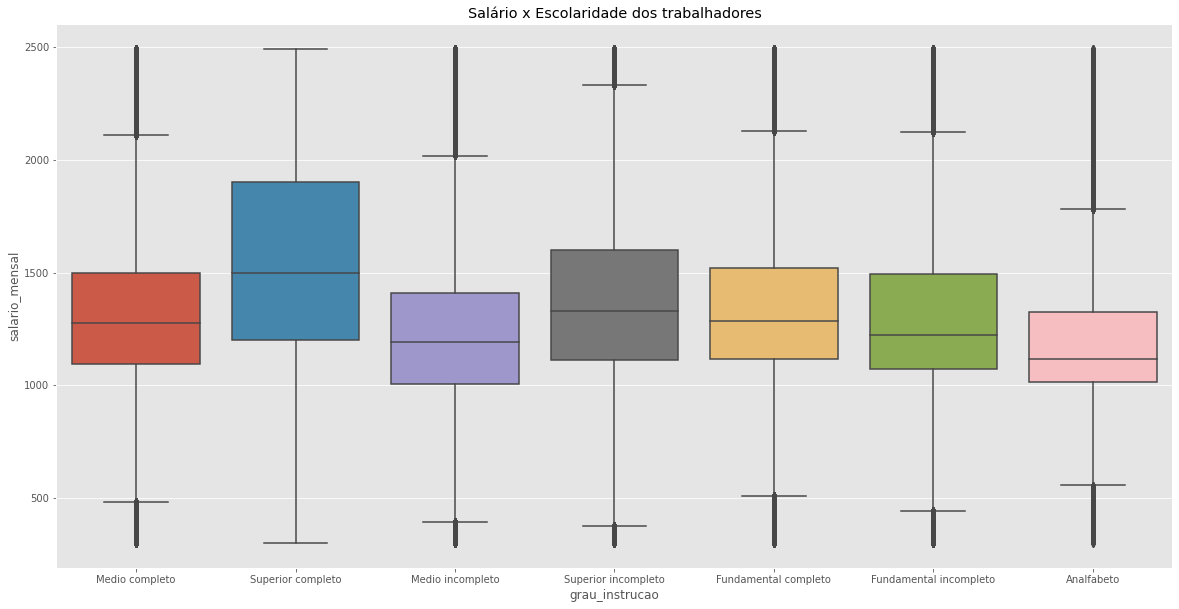

In [39]:
#Boxplot com os salários do trabalhadores distribuidos por escolaridade e salário mensal
plt.figure(figsize = (20,10))
plt.style.use('ggplot')
plt.xticks(np.arange(0,7),labels = ['Analfabeto','Fundamental incompleto','Fundamental completo','Medio incompleto','Medio completo','Superior incompleto','Superior completo'])
plt.title('Salário x Escolaridade dos trabalhadores')
sns.boxplot(x = salario_sem_outlier['grau_instrucao'], 
            y = salario_sem_outlier['salario_mensal'])
plt.savefig('BoxplotEscol_salario.png')